## Chapter 12: MLOps

### 12.8.3 Implementing Data Drift

In [4]:
#!pip install alibi alibi_detect

In [5]:
import alibi
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from alibi_detect.cd import TabularDrift

In [6]:
train = pd.read_csv( "train.csv" )
prod = pd.read_csv( "prod.csv" )

In [7]:
x_features = list(train.columns)
x_features.remove('chd')

In [8]:
x_features

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age']

#### Specify the index of the columns which are categorical feautures

In [9]:
cat_vars = [4]

In [10]:
categories_per_feature = {f: None for f in cat_vars}

In [11]:
categories_per_feature

{4: None}

### Measure the drift

In [12]:
cd = TabularDrift(train[x_features].values, 
                  p_val=.05, 
                  categories_per_feature=categories_per_feature)

In [13]:
preds = cd.predict(prod[x_features].to_numpy())

### Printing the test results

In [14]:
for f in range(cd.n_features):
    # chi-squared test for the categorical features and KS test for the numerical features
    stat = 'Chi2' if f in list(categories_per_feature.keys()) else 'K-S'
    fname = x_features[f]
    stat_val, p_val = preds['data']['distance'][f], preds['data']['p_val'][f]
    # print the p-value for the tests to observe statistical significance 
    print(f'{fname} -- {stat} {stat_val:.3f} -- p-value {p_val:.3f}')

sbp -- K-S 0.139 -- p-value 0.144
tobacco -- K-S 0.069 -- p-value 0.888
ldl -- K-S 0.205 -- p-value 0.007
adiposity -- K-S 0.166 -- p-value 0.047
famhist -- Chi2 0.389 -- p-value 0.533
typea -- K-S 0.087 -- p-value 0.663
obesity -- K-S 0.190 -- p-value 0.015
alcohol -- K-S 0.105 -- p-value 0.426
age -- K-S 0.117 -- p-value 0.298


### Checking the distribution of Owner_Type in training and production data

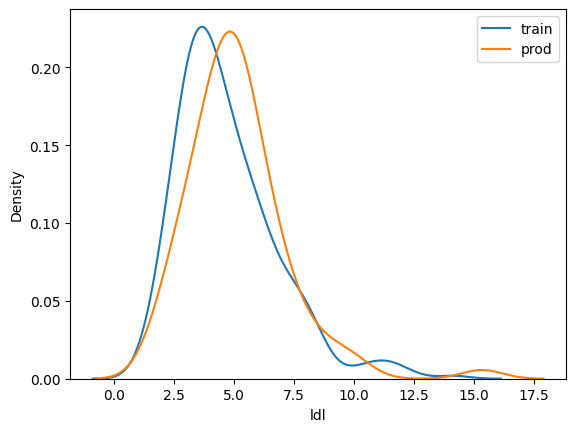

In [217]:
sn.kdeplot(data = train, x = 'ldl', label = 'train');
sn.kdeplot(data = prod, x = 'ldl', label = 'prod');
plt.legend();